<a href="https://colab.research.google.com/github/rahuldevkar5/Data_Science/blob/main/Clustering_Q2_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
crime=pd.read_csv("/content/crime_data.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
columns=['Murder', 'Assault','Rape','UrbanPop']
crime1=crime[columns]

In [4]:
input=['Murder', 'Assault','Rape']
output=['UrbanPop']
x=crime1[input]
y=crime1[output]

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch

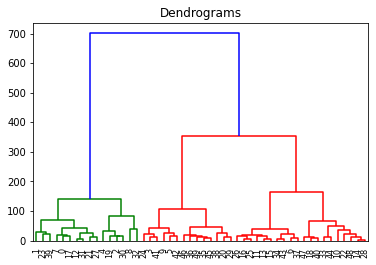

In [6]:
plt.title("Dendrograms")
dendrogram = sch.dendrogram(sch.linkage(crime1, method='ward'))

In [7]:
from sklearn.cluster import AgglomerativeClustering

In [8]:
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
hc.fit(x)
hc.fit_predict(x)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [9]:
y_predict=hc.fit_predict(crime1[['UrbanPop']])
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0])

In [10]:
import sklearn.metrics as sm
sm.accuracy_score(y_predict,hc.fit_predict(x))

0.94

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

In [12]:
crime=pd.read_csv("/content/crime_data.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [13]:
columns=['Murder', 'Assault','Rape','UrbanPop']
crime1=crime[columns]

In [14]:
input=['Murder', 'Assault','Rape']
output=['UrbanPop']
x=crime1[input]
y=crime1[output]

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_crime_df = scaler.fit_transform(crime.iloc[:,1:4])

In [16]:
from sklearn.cluster import KMeans

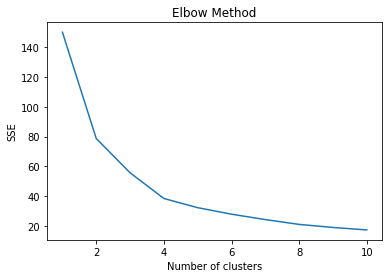

In [17]:
K_rng= range(1,11)
sse=[]
for K in K_rng:
    km=KMeans(n_clusters=K,random_state=0)
    km.fit(scaled_crime_df)
    sse.append(km.inertia_)   
plt.plot(range(1, 11), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [18]:
km=KMeans(n_clusters=4)
km
km.fit(x)
km.labels_

array([1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 0, 3, 1, 3, 0, 3, 3, 1, 0, 1, 2, 1,
       0, 1, 2, 3, 3, 1, 0, 2, 1, 1, 1, 0, 3, 2, 2, 3, 2, 1, 3, 2, 2, 3,
       0, 2, 2, 0, 0, 2], dtype=int32)

In [19]:
y_predict=km.fit_predict(crime1[['UrbanPop']])
y_predict

array([3, 1, 2, 3, 2, 2, 2, 0, 2, 3, 2, 3, 2, 0, 3, 0, 3, 0, 3, 0, 2, 0,
       0, 1, 0, 3, 3, 2, 3, 2, 0, 2, 1, 1, 0, 0, 0, 0, 2, 1, 1, 3, 2, 2,
       1, 0, 0, 1, 0, 3], dtype=int32)

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

In [21]:
crime=pd.read_csv("/content/crime_data.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [22]:
crime_c=crime.drop(['Unnamed: 0'],axis=1,inplace=True)
crime_c

In [23]:
columns=['Murder', 'Assault','Rape','UrbanPop']
crime1=crime[columns]

In [24]:
input=['Murder', 'Assault','Rape']
output=['UrbanPop']
x=crime1[input]
y=crime1[output]

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_crime_df = scaler.fit_transform(crime.iloc[:,1:4])

In [26]:
from sklearn.cluster import DBSCAN

In [27]:
model=DBSCAN(eps=0.25,min_samples=10)
model.fit(x)

DBSCAN(algorithm='auto', eps=0.25, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)

In [28]:
model.labels_


array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [29]:
cl=pd.DataFrame(model.labels_,columns=['cluster'])
cl.head()

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1


In [30]:
pd.concat([crime,cl],axis=1).head()

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,-1
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
